In [1]:
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
import json

cityname = "Seoul"
limit = 3
apikey = "*****"

url_location = 'http://api.openweathermap.org/geo/1.0/direct?q={}&limit={}&appid={}'.format(cityname, limit, apikey)

html = urlopen(url_location)
soup = BeautifulSoup(html, 'html.parser')

loc_list = json.loads(soup.text)
loc_list

lat = loc_list[0]['lat']
lon = loc_list[0]['lon']

# 켈빈 온도 api가 default
# url_history = "http://api.openweathermap.org/data/2.5/forecast?lat={}&lon={}&appid={}".format(lat, lon, apikey)
url_history = "http://api.openweathermap.org/data/2.5/forecast?lat={}&lon={}&appid={}&units=metric".format(lat, lon, apikey)

# 섭씨 온도로 api 받는 옵션
# lat={}&lon={}&appid={}&units=metric

html2 = requests.get(url_history).text
soup2 = BeautifulSoup(html2, 'html.parser')
weather = json.loads(soup2.text)

# weather['list'][0]
# weather['list'][0]['main']
# weather['list'][0]['main']['temp']

weather_list = weather['list']

temp_list = []
dt_list = []
for i in range(len(weather_list)):
    temp_list.append(weather_list[i]['main']['temp'])
    dt_list.append(weather_list[i]['dt_txt'])

temp_dict = {}
for i in range(len(weather_list)):
    temp_dict[weather_list[i]['dt_txt']] = weather_list[i]['main']['temp']

temp_dict
# temp_c_list = []
# for i in temp_list:
#     temp_c = i - 273.15
#     temp_c_list.append(temp_c)

{'2025-07-31 12:00:00': 29.87,
 '2025-07-31 15:00:00': 27.73,
 '2025-07-31 18:00:00': 25.36,
 '2025-07-31 21:00:00': 26.19,
 '2025-08-01 00:00:00': 29.72,
 '2025-08-01 03:00:00': 34.61,
 '2025-08-01 06:00:00': 36.08,
 '2025-08-01 09:00:00': 32.83,
 '2025-08-01 12:00:00': 30.17,
 '2025-08-01 15:00:00': 29.46,
 '2025-08-01 18:00:00': 28.1,
 '2025-08-01 21:00:00': 27.18,
 '2025-08-02 00:00:00': 29.77,
 '2025-08-02 03:00:00': 33.22,
 '2025-08-02 06:00:00': 34.7,
 '2025-08-02 09:00:00': 32.12,
 '2025-08-02 12:00:00': 29.11,
 '2025-08-02 15:00:00': 27.91,
 '2025-08-02 18:00:00': 27.02,
 '2025-08-02 21:00:00': 26.37,
 '2025-08-03 00:00:00': 28.43,
 '2025-08-03 03:00:00': 32.62,
 '2025-08-03 06:00:00': 31.58,
 '2025-08-03 09:00:00': 29,
 '2025-08-03 12:00:00': 26.75,
 '2025-08-03 15:00:00': 26.22,
 '2025-08-03 18:00:00': 24.26,
 '2025-08-03 21:00:00': 24.09,
 '2025-08-04 00:00:00': 25.46,
 '2025-08-04 03:00:00': 26.84,
 '2025-08-04 06:00:00': 31.4,
 '2025-08-04 09:00:00': 30.56,
 '2025-08-04 1

### 온도 그래프 그리기

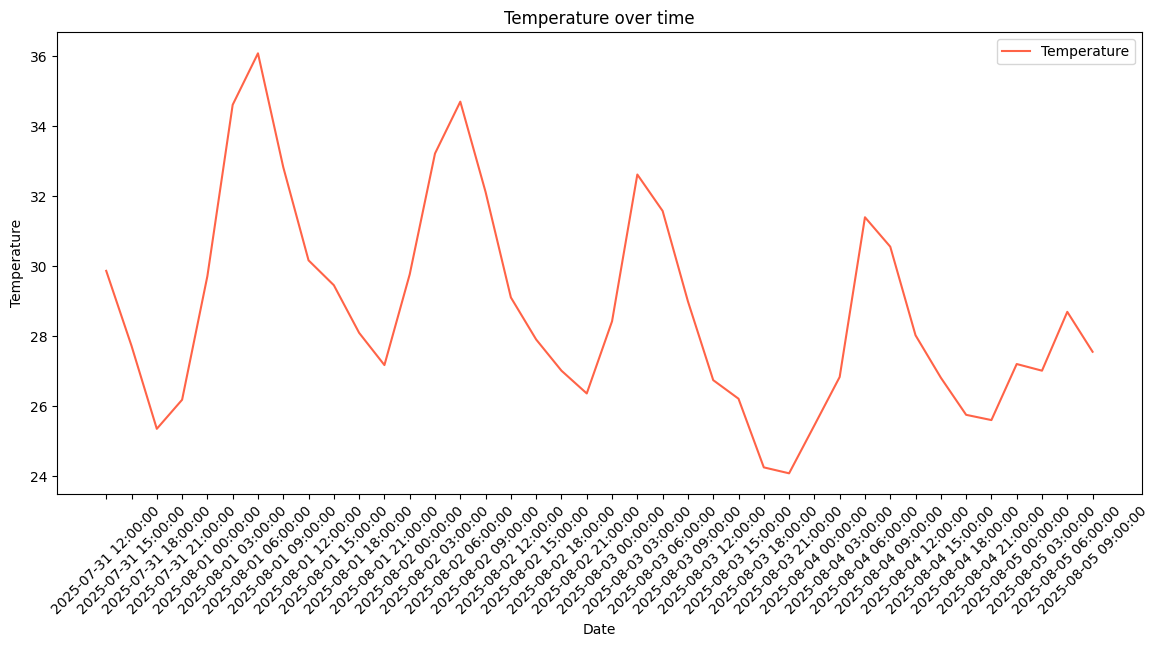

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(dt_list, temp_list, color='tomato', label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature over time')
plt.xticks(rotation=45)
plt.legend()
plt.show()